# Question 1: Application of Diﬀerentiation in AI Model Optimization

In [133]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import display

In [134]:
x, y = sp.symbols('x y')
loss_function = sp.exp(x**2 + y**2) + sp.cos(x * y)

L = sp.Function('L')

loss_function_equation = sp.Eq(L(x,y), loss_function)

print('Loss function is give by :')
display(loss_function_equation)

Loss function is give by :


Eq(L(x, y), exp(x**2 + y**2) + cos(x*y))

In [135]:
# (a) Find the partial derivatives

partial_derivative_x = sp.diff(loss_function, x)
partial_derivative_y = sp.diff(loss_function, y)

partial_derivative_eq_x = sp.Eq(sp.Symbol('\u2202L/\u2202x'), partial_derivative_x)
partial_derivative_eq_y = sp.Eq(sp.Symbol('\u2202L/\u2202y'), partial_derivative_y)

display(partial_derivative_eq_x)
display(partial_derivative_eq_y)

Eq(∂L/∂x, 2*x*exp(x**2 + y**2) - y*sin(x*y))

Eq(∂L/∂y, -x*sin(x*y) + 2*y*exp(x**2 + y**2))

In [136]:
# (b) Write a Python function that computes the gradient vector for a given input (x,y).

def compute_gradient(x_value, y_value):
    gradient_x = partial_derivative_x.evalf(subs={x:x_value, y:y_value})
    gradient_y = partial_derivative_y.evalf(subs={x:x_value, y:y_value})
    return gradient_x, gradient_y

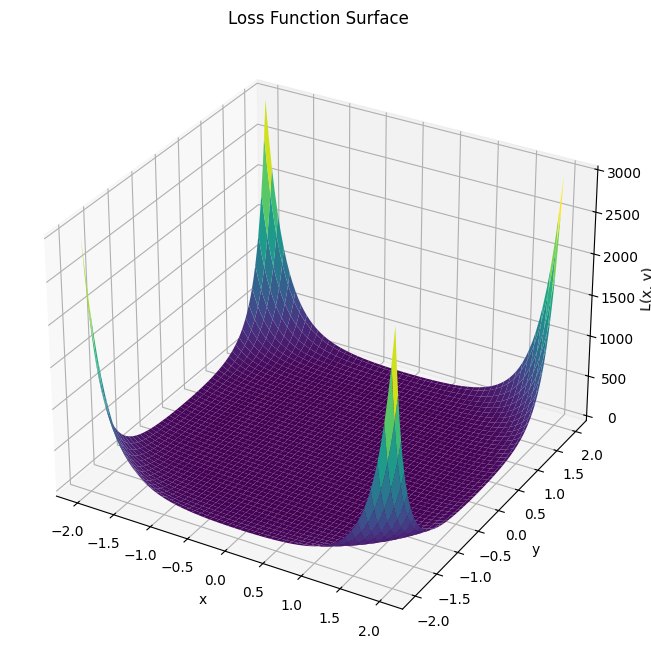

In [137]:
# (c) Use Matplotlib to visualize the loss function as a 3D surface plot over the range x,y ∈ [−2,2].

def loss_function_numeric(x,y):
    return np.exp(x**2 + y**2) + np.cos(x * y)

x_values = np.linspace(-2, 2, 100)
y_values = np.linspace(-2, 2, 100)
x_grid, y_grid = np.meshgrid(x_values, y_values)

z_values = loss_function_numeric(x_grid, y_grid)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x_grid, y_grid, z_values, cmap='viridis', edgecolor='none')
ax.set_title('Loss Function Surface')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('L(x, y)')

plt.show()

In [138]:
# (d) Discuss the significance of gradient vectors in model optimization, particularly in gradient descent methods.
discussion = """
Gradient vectors are essential for model optimization as they determine the direction and magnitude of parameter updates in methods like gradient descent.
Their significance lies in efficiently guiding models to minimize errors and achieve better performance, making them foundational to many machine learning and deep
learning algorithms.
"""

print(discussion)


Gradient vectors are essential for model optimization as they determine the direction and magnitude of parameter updates in methods like gradient descent.
Their significance lies in efficiently guiding models to minimize errors and achieve better performance, making them foundational to many machine learning and deep
learning algorithms.



# Question 2: Integration for Signal Processing

In [139]:
t = sp.Symbol('t')
amplitude_of_signal_function = 2*t**(2)*sp.exp(-t)

A = sp.Function('A')
amplitude_of_signal_function_eq = sp.Eq(A(t), amplitude_of_signal_function)

print('The amplitude of a signal A(t) can be modeled by the function : ')
display(amplitude_of_signal_function_eq)

The amplitude of a signal A(t) can be modeled by the function : 


Eq(A(t), 2*t**2*exp(-t))

In [140]:
# (a) Use the Python library SymPy to compute the definite integral

integral_value = sp.integrate(amplitude_of_signal_function, (t, 0, 4))
display(integral_value)

4 - 52*exp(-4)

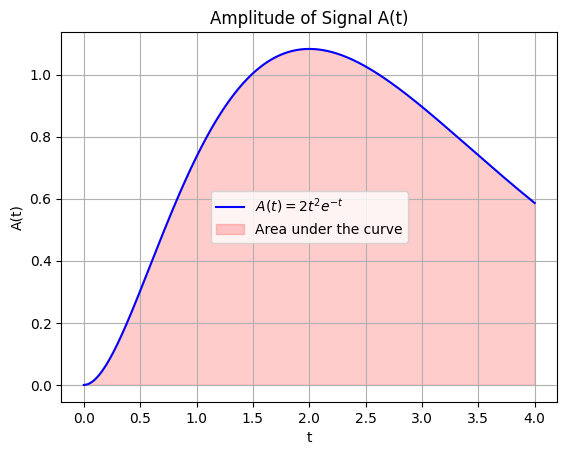

In [141]:
# (b) Plot the function A(t) using Matplotlib and annotate the graph with the area under the curve corresponding to the integral.

def amplitude_of_signal_function_numeric(t):
    return 2 * t**2 * np.exp(-t)

t_values = np.linspace(0, 4, 500)
Amplitude_values = amplitude_of_signal_function_numeric(t_values)

amplitude_latex = f"${sp.latex(amplitude_of_signal_function_eq)}$"

plt.plot(t_values, Amplitude_values, label=amplitude_latex, color='blue')
plt.fill_between(t_values, Amplitude_values, alpha=0.2, label="Area under the curve", color='red')

plt.title("Amplitude of Signal A(t)")
plt.xlabel("t")
plt.ylabel("A(t)")
plt.legend()
plt.grid()

plt.show()

In [142]:
# (c) Interpret the meaning of the computed integral in the context of signal energy

interpretation = """
The computed integral represents the total signal energy over the interval [0, 4].
This quantifies the cumulative strength or power of the signal within this time frame.
"""

print(interpretation)


The computed integral represents the total signal energy over the interval [0, 4].
This quantifies the cumulative strength or power of the signal within this time frame.



# Question 3: Series Convergence and Numerical Approximation

In [144]:
x = sp.Symbol('x')
series_equation = sp.series(sp.ln(1 + x), x , 0, 5)

f = sp.Function('f')
series_eq = sp.Eq(f(x), series_equation)

print("The function f(x) = ln(1 + x) can be approximated by the series:")
display(series_eq)

The function f(x) = ln(1 + x) can be approximated by the series:


Eq(f(x), x - x**2/2 + x**3/3 - x**4/4 + O(x**5))

In [145]:
# (a) Implement a Python script that uses the first 10 terms of this series to approximate ln(1 + x) for x ∈ [−1,1]

def series_ln1x(x, n_terms=10):
    return sum(((-1)**(n + 1)) * (x**n) / n for n in range(1, n_terms + 1))

x_values = np.linspace(-1, 1, 500)
ln_approximate_values = [series_ln1x(x) for x in x_values]

ln_actual_values = np.log(1 + x_values)

/var/folders/h2/cq81m0h16gj2mb69427tblgw0000gn/T/ipykernel_97588/995236568.py:9: RuntimeWarning: divide by zero encountered in log
  ln_actual_values = np.log(1 + x_values)


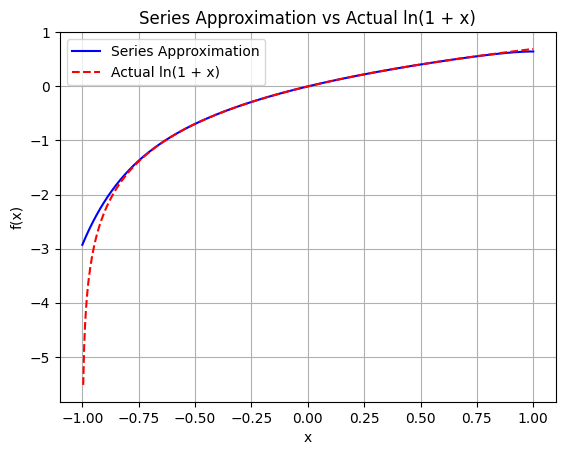

In [146]:
# Question 3(b): Plot the approximation and actual ln(1 + x) on the same graph

plt.plot(x_values, ln_approximate_values, label='Series Approximation', color='blue')
plt.plot(x_values, ln_actual_values, label='Actual ln(1 + x)', color='red', linestyle='dashed')
plt.title("Series Approximation vs Actual ln(1 + x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

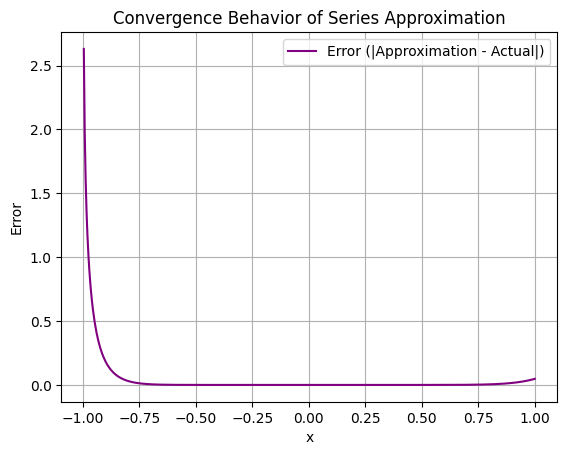


The error is smallest around x = 0, because the series converges well around values near the center of expansion.
As x moves away from 0 the error increases and that is because the series converges slower for large |x| values.
The sharp increase at x = -1 is due to divergence of ln(1 + x), while the small/gentle increase of error near near x = 1 is due to slower convergence.



In [149]:
# (c) Analyze the convergence behavior of the series, particularly focusing on the error for larger values of x.

errors = np.abs(np.array(ln_approximate_values) - ln_actual_values)

plt.plot(x_values, errors, label='Error (|Approximation - Actual|)', color='purple')
plt.title("Convergence Behavior of Series Approximation")
plt.xlabel("x")
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.show()

Explanation = """
The error is smallest around x = 0, because the series converges well around values near the center of expansion.
As x moves away from 0 the error increases and that is because the series converges slower for large |x| values.
The sharp increase at x = -1 is due to divergence of ln(1 + x), while the small/gentle increase of error near near x = 1 is due to slower convergence.
"""

print(Explanation)

# Question 4: Fourier Transform for Data Filtering

In [150]:
t = sp.Symbol('t')
s = sp.Function('s')
signal_equation = sp.Eq(s(t), sp.sin(2*sp.pi*t) + 0.5*sp.sin(10*sp.pi*t) + 0.3*sp.sin(50*sp.pi*t))

print('A noisy signal s(t) is sampled over the interval t ∈ [0,1] with 500 sample points')
display(signal_equation)

A noisy signal s(t) is sampled over the interval t ∈ [0,1] with 500 sample points


Eq(s(t), sin(2*pi*t) + 0.5*sin(10*pi*t) + 0.3*sin(50*pi*t))

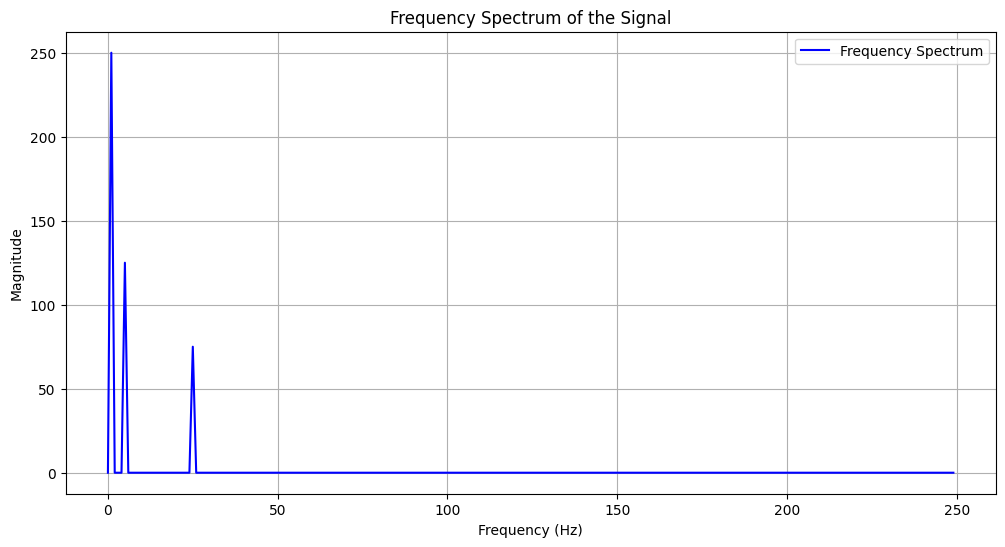

In [152]:
# (a) Perform a Fourier Transform on this signal using NumPy and plot the frequency spectrum.

sampling_rate = 500
t = np.linspace(0, 1, sampling_rate, endpoint=False)
signal = np.sin(2*np.pi*t) + 0.5*np.sin(10*np.pi*t) + 0.3*np.sin(50*np.pi*t)

# Perform Fourier Transform
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(t), d=1/sampling_rate)

plt.figure(figsize=(12, 6))
plt.plot(frequencies[:sampling_rate//2], np.abs(fft_result[:sampling_rate//2]), color='blue', label="Frequency Spectrum")
plt.title("Frequency Spectrum of the Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.legend()
plt.show()

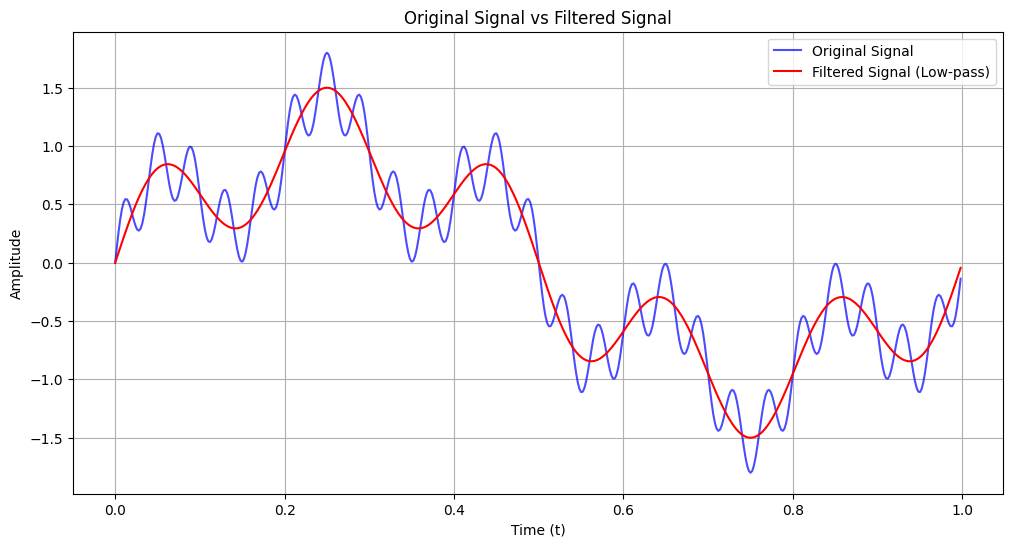

In [153]:
# (b) Design and apply a low-pass filter to remove frequencies above 20 Hz, then plot the filtered signal.

# low-pass filter
low_pass_filter = np.abs(frequencies) <= 20
filtered_fft = fft_result * low_pass_filter

# Transform back to time domain (inverse FFT)
filtered_signal = np.fft.ifft(filtered_fft).real

plt.figure(figsize=(12, 6))
plt.plot(t, signal, label='Original Signal', color='blue', alpha=0.7)
plt.plot(t, filtered_signal, label='Filtered Signal (Low-pass)', color='red')
plt.title("Original Signal vs Filtered Signal")
plt.xlabel("Time (t)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

In [154]:
# (c) Discuss how filtering impacts the signal and its applications in real-world data science scenarios, such as noise reduction in audio processing.

Discuss = """
The Fourier Transform allows us to analyze the frequency components of a signal. By applying a low-pass filter, we removed
frequencies above 20 Hz, effectively reducing the high-frequency noise in the signal. This is a common technique in audio
processing to enhance the quality of signals by retaining only the desired frequency components, such as the fundamental tones.
Real-world applications include:
   - Noise reduction in audio processing
   - Cleaning data for analysis in sensors and communication systems
   - Enhancing clarity in medical imaging by removing artifacts.
"""
print(Discuss)


The Fourier Transform allows us to analyze the frequency components of a signal. By applying a low-pass filter, we removed
frequencies above 20 Hz, effectively reducing the high-frequency noise in the signal. This is a common technique in audio
processing to enhance the quality of signals by retaining only the desired frequency components, such as the fundamental tones.
Real-world applications include:
   - Noise reduction in audio processing
   - Cleaning data for analysis in sensors and communication systems
   - Enhancing clarity in medical imaging by removing artifacts.



# Question 5: Image Processing Using Fourier and Discrete Cosine Transforms

In [156]:
image_path = "/Users/teransenevirathne/Desktop/CM2607_CW_2409084/Image-2.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

image_array = np.array(image, dtype=np.float32)

/var/folders/h2/cq81m0h16gj2mb69427tblgw0000gn/T/ipykernel_97588/287355762.py:18: RuntimeWarning: divide by zero encountered in log
  dft_mask_magnitude = 200 * np.log(cv2.magnitude(dft_with_mask[:, :, 0], dft_with_mask[:, :, 1]))


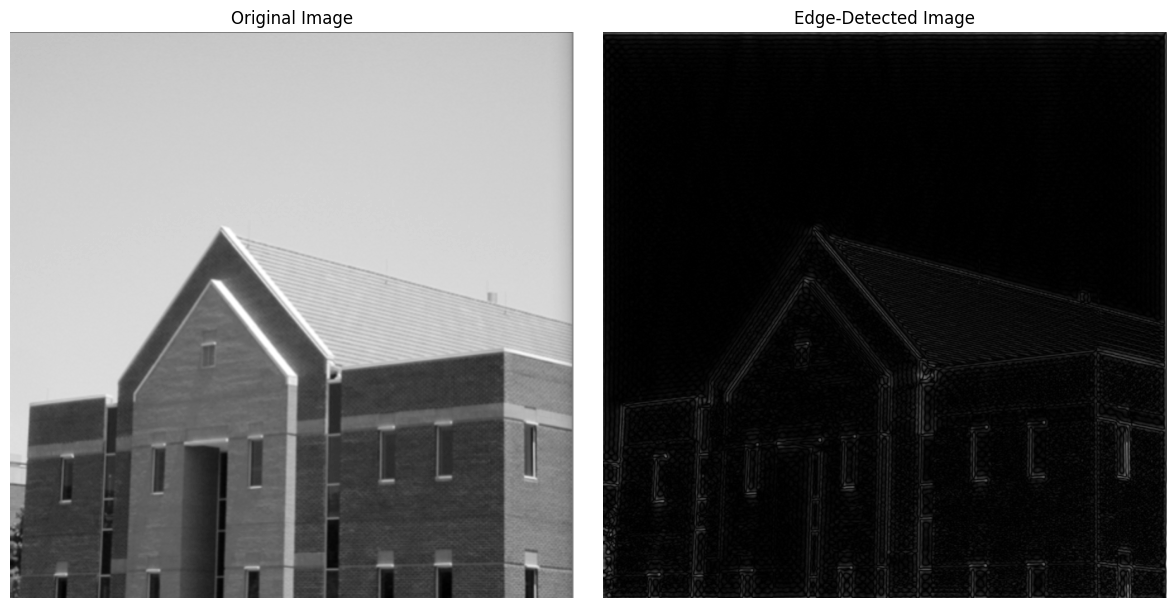

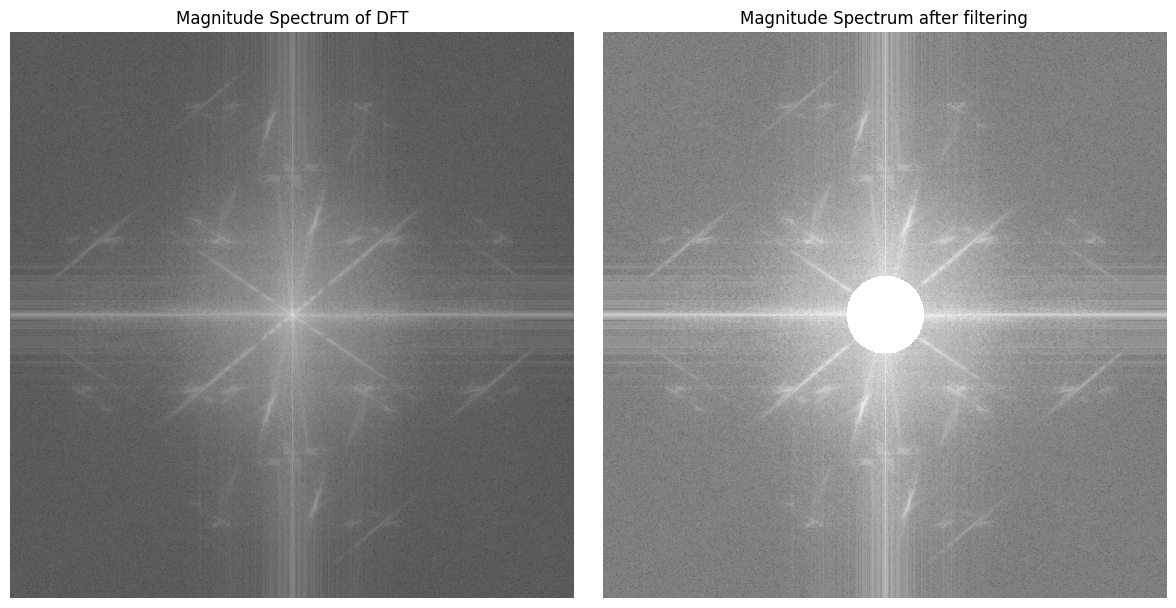

In [157]:
# (a) Find the edges in the image using a 2D Fourier Transform. Visualize the resulting image with detected edges.

dft = cv2.dft(image_array, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted = np.fft.fftshift(dft)
magnitude_spectrum = 200 * np.log(cv2.magnitude(dft_shifted[:, :, 0], dft_shifted[:, :, 1]))

rows, cols = image_array.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.ones((rows, cols, 2), np.uint8)

low_freq_radius = 60
y, x = np.ogrid[:rows, :cols]
mask_area = (x - ccol)**2 + (y - crow)**2 <= low_freq_radius**2
mask[mask_area] = 0

dft_with_mask = dft_shifted * mask

dft_mask_magnitude = 200 * np.log(cv2.magnitude(dft_with_mask[:, :, 0], dft_with_mask[:, :, 1]))

dft_shifted_back = np.fft.ifftshift(dft_with_mask)
img_back = cv2.idft(dft_shifted_back)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])


fig1 = plt.figure(figsize=(12, 6))

ax1 = fig1.add_subplot(1, 2, 1)
ax1.imshow(image, cmap='gray')
ax1.title.set_text('Original Image')
ax1.axis('off')

ax2 = fig1.add_subplot(1, 2, 2)
ax2.imshow(img_back, cmap='gray')
ax2.title.set_text('Edge-Detected Image')
ax2.axis('off')

plt.tight_layout()
plt.show()

fig2 = plt.figure(figsize=(12, 6))

ax3 = fig2.add_subplot(1, 2, 1)
ax3.imshow(magnitude_spectrum, cmap='gray')
ax3.title.set_text('Magnitude Spectrum of DFT')
ax3.axis('off')

ax4 = fig2.add_subplot(1, 2, 2)
ax4.imshow(dft_mask_magnitude, cmap='gray')
ax4.title.set_text('Magnitude Spectrum after filtering')
ax4.axis('off')

plt.tight_layout()
plt.show()

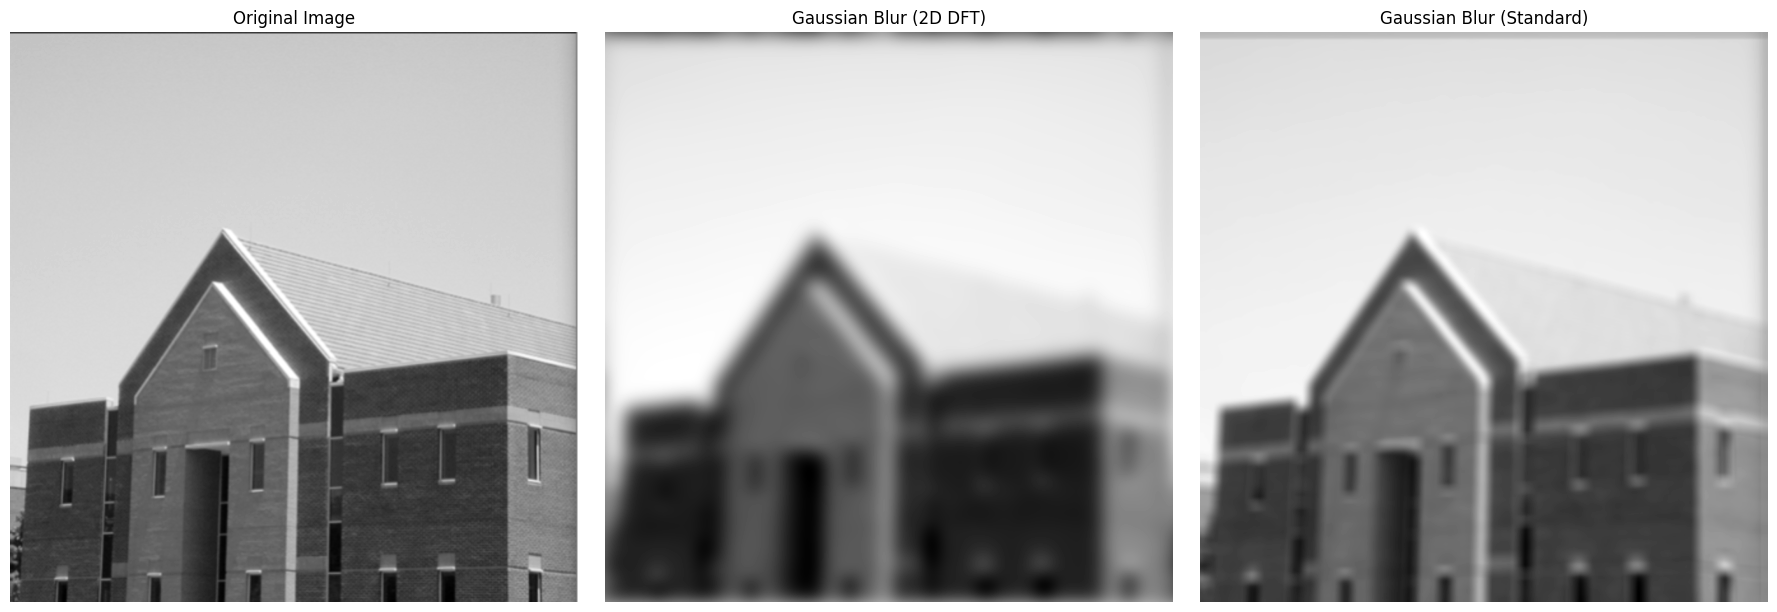


~ Gaussian Blur (using 2D Fourier Transform) - Applies a Gaussian filter in the frequency domain, providing a precise frequency-based blur but is computationally
                                               more complicated.
~ Gaussian Blur (Standard) - Applies a Gaussian filter in the spatial domain, offering faster and smoother results, making it more practical for everyday
                             applications. In the above case I have just used OpenCV.

For general image processing tasks, the standard Gaussian blur is more practical and efficient.
The 2D Fourier Transform Gaussian blur is valuable when precise control in the frequency domain is required.



In [158]:
# (b) Apply a Gaussian blur to the original image using a 2D Fourier Transform and compare it to a standard Gaussian blur.

# Gaussian Blur using 2D Fourier Transform
def gaussian_blur_dft(image, sigma):
    rows, cols = image.shape
    crow, ccol = int(rows / 2), int(cols / 2)

    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shifted = np.fft.fftshift(dft)

    x = np.arange(cols)
    y = np.arange(rows)
    x, y = np.meshgrid(x, y)
    gaussian_mask = np.exp(-((x - ccol)**2 + (y - crow)**2) / (2 * sigma**2))
    gaussian_mask = np.repeat(gaussian_mask[:, :, np.newaxis], 2, axis=2)

    dft_blurred = dft_shifted * gaussian_mask

    dft_blurred_back = np.fft.ifftshift(dft_blurred)
    image_blurred_dft = cv2.idft(dft_blurred_back)
    image_blurred_dft = cv2.magnitude(image_blurred_dft[:, :, 0], image_blurred_dft[:, :, 1])

    return image_blurred_dft

# Standard Gaussian Blur
def gaussian_blur_standard(image, sigma, ksize=(21, 21)):
    return cv2.GaussianBlur(image, ksize, sigmaX=sigma, sigmaY=sigma)

# Apply both Gaussian blurs
sigma = 10
blurred_dft = gaussian_blur_dft(image, sigma)
blurred_standard = gaussian_blur_standard(image, sigma)


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(blurred_dft, cmap='gray')
axes[1].set_title("Gaussian Blur (2D DFT)")
axes[1].axis('off')

axes[2].imshow(blurred_standard, cmap='gray')
axes[2].set_title("Gaussian Blur (Standard)")
axes[2].axis('off')

plt.tight_layout()
plt.show()

Comparison = """
~ Gaussian Blur (using 2D Fourier Transform) - Applies a Gaussian filter in the frequency domain, providing a precise frequency-based blur but is computationally
                                               more complicated.
~ Gaussian Blur (Standard) - Applies a Gaussian filter in the spatial domain, offering faster and smoother results, making it more practical for everyday
                             applications. In the above case I have just used OpenCV.

For general image processing tasks, the standard Gaussian blur is more practical and efficient.
The 2D Fourier Transform Gaussian blur is valuable when precise control in the frequency domain is required.
"""

print(Comparison)

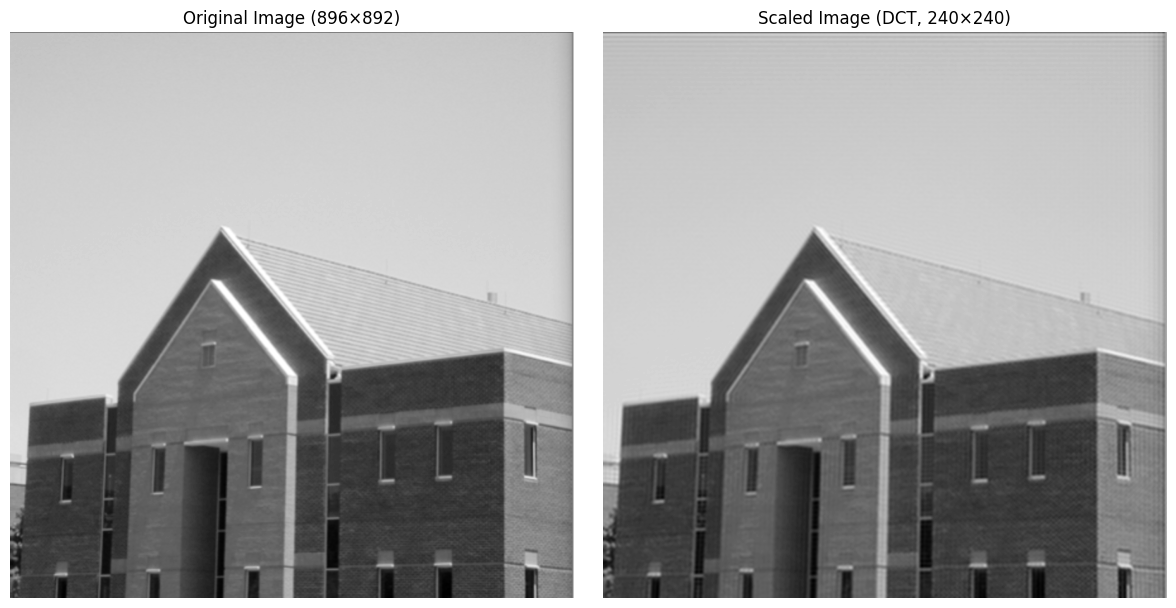


The scaled image still keeps the basic structural features of the original image.
But small details are removed by keeping the low frequency componets from Discrete Cosine Transform.
Compared to the the original image, the scaled image looks smoother and less sharp due to removal of high frequency details



In [159]:
# (c) Apply a Discrete Cosine Transform (DCT) to the original image. Then, scale the image down to 240px × 240px using the DCT. Display the scaled image and compare it to the original.

dct = cv2.dct(np.float32(image))

scaled_dct = np.zeros_like(dct)
scaled_dct[:240, :240] = dct[:240, :240]

scaled_image = cv2.idct(scaled_dct)

original_size = image.shape

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image, cmap='gray')
axes[0].set_title(f"Original Image ({original_size[0]}×{original_size[1]})")
axes[0].axis('off')

axes[1].imshow(scaled_image, cmap='gray')
axes[1].set_title("Scaled Image (DCT, 240×240)")
axes[1].axis('off')

plt.tight_layout()
plt.show()

comparison = """
The scaled image still keeps the basic structural features of the original image.
But small details are removed by keeping the low frequency componets from Discrete Cosine Transform.
Compared to the the original image, the scaled image looks smoother and less sharp due to removal of high frequency details
"""

print(comparison)

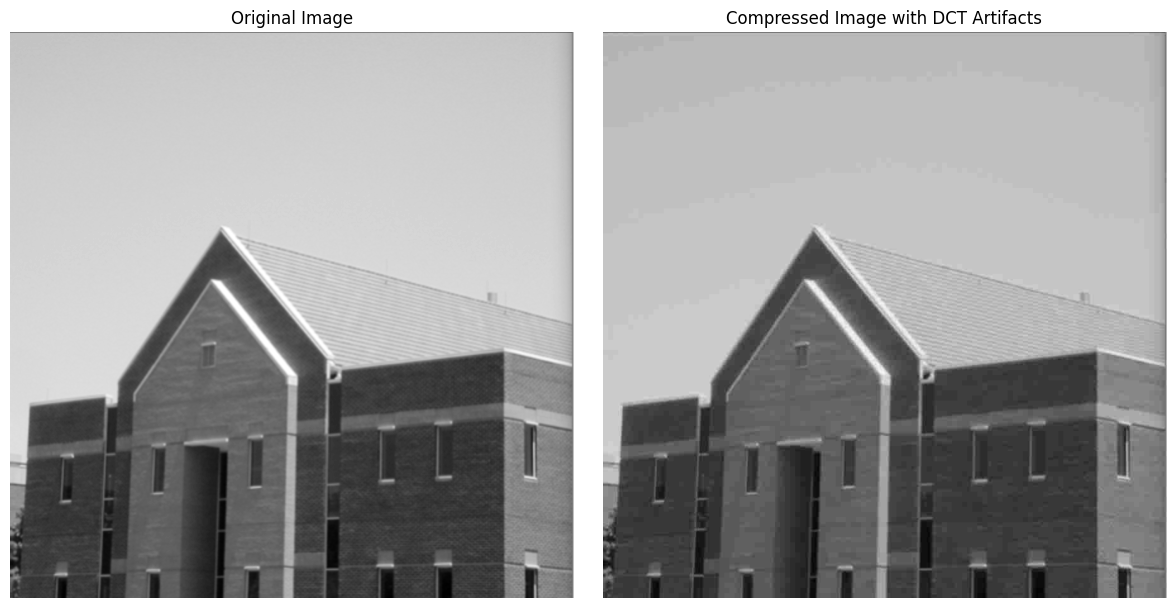


The compressed image exhibits two major artifacts common in DCT-based compressions, Blocking Artifacts and Ringing Artifacts.
~ Blocking Artifacts - These are visible as pattern in areas of smooth intensity like sky and walls in the above.
                       The reason is because the image is divided into non overlapping blocks, and each block is compressed independently.

~ Ringing Artifacts  - These are visible as slight curves or ripples around sharp edges like roof edges and wall edges in the above.
                       The reason is because of quantisation of high-frequency DCT coefficients which gives small oscillations around high contrast edges.



In [160]:
# (d) Reproduce and explain the common artifacts (ringing and blocking) that occur when an image is compressed using DCT. Provide visual examples of these artifacts.

def blockwise_dct(image, block_size=8, quantization_factor=50):
    h, w = image.shape
    dct_img = np.zeros_like(image, dtype=np.float32)
    idct_img = np.zeros_like(image, dtype=np.float32)

    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = np.float32(image[i:i+block_size, j:j+block_size])
            block_dct = cv2.dct(block)

            block_dct_quantized = np.round(block_dct / quantization_factor) * quantization_factor

            block_idct = cv2.idct(block_dct_quantized)

            dct_img[i:i+block_size, j:j+block_size] = block_dct_quantized
            idct_img[i:i+block_size, j:j+block_size] = block_idct

    return idct_img

compressed_img = blockwise_dct(image, block_size=8, quantization_factor=50)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(compressed_img, cmap='gray')
axes[1].set_title("Compressed Image with DCT Artifacts")
axes[1].axis('off')

plt.tight_layout()
plt.show()

Explanation = """
The compressed image exhibits two major artifacts common in DCT-based compressions, Blocking Artifacts and Ringing Artifacts.
~ Blocking Artifacts - These are visible as pattern in areas of smooth intensity like sky and walls in the above.
                       The reason is because the image is divided into non overlapping blocks, and each block is compressed independently.

~ Ringing Artifacts  - These are visible as slight curves or ripples around sharp edges like roof edges and wall edges in the above.
                       The reason is because of quantisation of high-frequency DCT coefficients which gives small oscillations around high contrast edges.
"""

print(Explanation)